In [11]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [12]:
whale_returns_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/whale_returns.csv")
algo_returns_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/algo_returns.csv")
sp500_returns_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/sp500_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df = pd.read_csv(sp500_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [13]:
# reading whale returns 
# added additional lines# here to help with a later error I was receiving from the "0" in the df causing an infinity
whale_rename = ['Soros_Fund', 'Paulson_Fund','Tiger_Fund', 'Berkshire_Fund']
whale_returns_df.columns = whale_rename

whale_returns_df.drop(whale_returns_df.loc[whale_returns_df['Soros_Fund']==0].index, inplace=True)
whale_returns_df.drop(whale_returns_df.loc[whale_returns_df['Paulson_Fund']==0].index, inplace=True)
whale_returns_df.drop(whale_returns_df.loc[whale_returns_df['Tiger_Fund']==0].index, inplace=True)
whale_returns_df.drop(whale_returns_df.loc[whale_returns_df['Berkshire_Fund']==0].index, inplace=True)
whale_returns_df.head()

,Soros_Fund,Paulson_Fund,Tiger_Fund,Berkshire_Fund
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [14]:
# count nulls
whale_returns_df.isnull().sum()

Soros_Fund        1
Paulson_Fund      1
Tiger_Fund        1
Berkshire_Fund    1
dtype: int64

In [15]:
# drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

Soros_Fund        0
Paulson_Fund      0
Tiger_Fund        0
Berkshire_Fund    0
dtype: int64

In [16]:
#reading algo returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [17]:
# count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [19]:
# read sp500
sp500_returns_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [20]:
# Check Data Types
# Note for grader, after I ran the code in line 63, the Close column changed from an object to a float
sp500_returns_df.dtypes

Close    object
dtype: object

In [21]:
# Fix Data Types
# Remove the $ sign and change string object to float

## saving the below code because when I first open this file I need to run it (with the .str designation), but after i run it once, it actually causes error because it changes the data to a float througout 
## sp500_returns_df['Close'] = sp500_returns_df['Close'].astype(float)
## sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$', '')

sp500_returns_df['Close'] = sp500_returns_df['Close'].astype(str).str.replace('$', '')
sp500_returns_df['Close'] = sp500_returns_df['Close'].astype(float)
sp500_returns_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [22]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

# Rename `Close` Column to be specific to this portfolio.
column_rename = ['sp500_DailyReturn']
sp500_daily_returns.columns = column_rename
sp500_daily_returns.head()

,sp500_DailyReturn
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
algo_daily_returns = algo_returns_df
whale_daily_returns = whale_returns_df

algo_daily_returns.dropna(inplace=True)
whale_daily_returns.dropna(inplace=True)

column_rename_2 = ['Algo1_DailyReturn', 'Algo2_DailyReturn']
column_rename_3 = ['Soros_DailyReturn', 'Paulson_DailyReturn', 'Tiger_DailyReturn', 'BerkShire_DailyReturn']
algo_daily_returns.columns = column_rename_2
whale_daily_returns.columns = column_rename_3

portfolio_appended_data = pd.concat([sp500_daily_returns, algo_daily_returns, whale_daily_returns], axis="columns", join="inner")
portfolio_appended_data.head()

,sp500_DailyReturn,Algo1_DailyReturn,Algo2_DailyReturn,Soros_DailyReturn,Paulson_DailyReturn,Tiger_DailyReturn,BerkShire_DailyReturn
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


In [25]:
# Plot daily returns of all portfolios

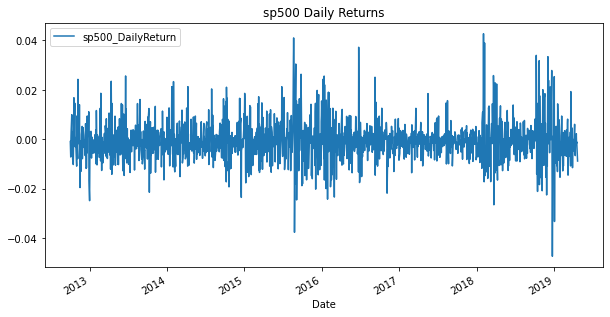

In [26]:
sp500_daily_returns.plot(figsize=(10,5), title="sp500 Daily Returns")

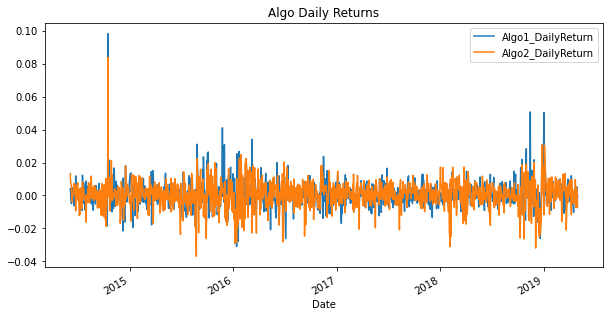

In [27]:
algo_daily_returns.plot(figsize=(10,5), title="Algo Daily Returns")

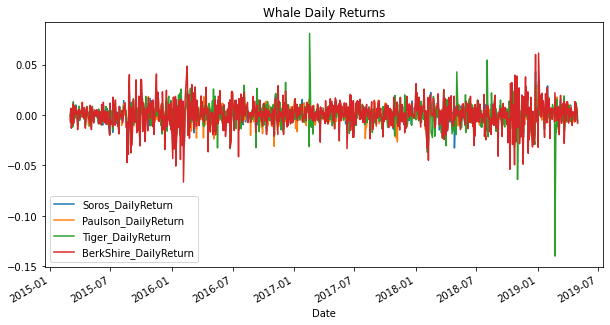

In [28]:
whale_daily_returns.plot(figsize=(10,5), title="Whale Daily Returns")

In [29]:
# Calculate cumulative returns of all portfolios
sp500_cumulative = (1 + sp500_daily_returns).cumprod() - 1
algo_cumulative =  (1 + algo_daily_returns).cumprod() - 1
whale_cumulative = (1 + whale_daily_returns).cumprod() - 1

# column name updates
column_cumulative_sp500 = ['sp500_CumulativeReturns']
column_cumulative_algo = ['algo1_CumulativeReturns', 'algo2_CumulativeReturns']
column_cumulative_whale = ['Soros_CumulativeReturns', 'Paulson_CumulativeReturns', 'Tiger_CumulativeReturns', 'BerkShire_CumulativeReturns']

sp500_cumulative.columns = column_cumulative_sp500
algo_cumulative.columns = column_cumulative_algo
whale_cumulative.columns = column_cumulative_whale

sp500_cumulative.head()

,sp500_CumulativeReturns
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578


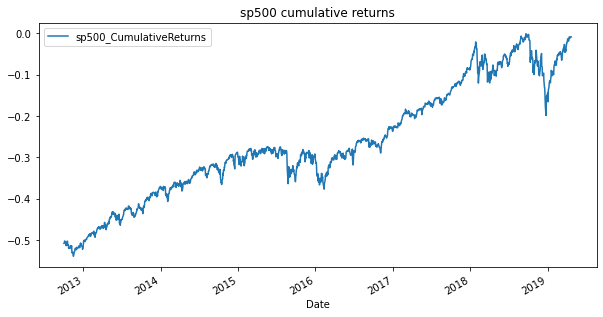

In [30]:
sp500_cumulative.plot(figsize=(10,5), title="sp500 cumulative returns")

In [31]:
algo_cumulative.head()

,algo1_CumulativeReturns,algo2_CumulativeReturns
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852


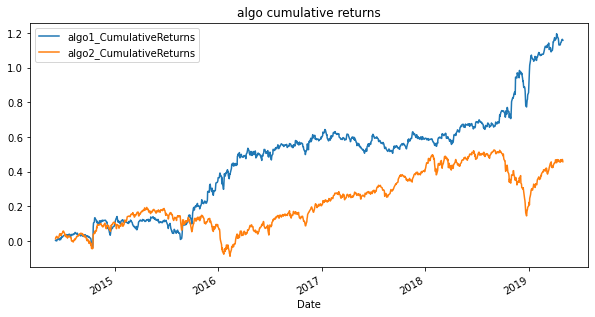

In [32]:
algo_cumulative.plot(figsize=(10,5), title="algo cumulative returns")

In [33]:
whale_cumulative.head()

,Soros_CumulativeReturns,Paulson_CumulativeReturns,Tiger_CumulativeReturns,BerkShire_CumulativeReturns
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466


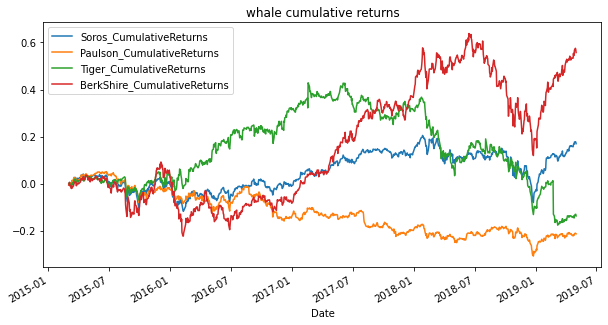

In [34]:
whale_cumulative.plot(figsize=(10,5), title="whale cumulative returns")

In [35]:
# I found the directions to be a bit confusing here, so I calculated the standard deviations, annualized them, then produced a single box plot comparing SP500, 
sp500_std = sp500_daily_returns.std()
algo_std = algo_daily_returns.std()
whale_std = whale_daily_returns.std() 

In [36]:
# annualize std
sp500_annualized_std = sp500_std * np.sqrt(252)
algo_annualized_std = algo_std * np.sqrt(252)
whale_annualized_std = whale_std * np.sqrt(252)

all_std = pd.DataFrame({
    "sp500": sp500_annualized_std,
    "algo": algo_annualized_std,
    "whale": whale_annualized_std
})

all_std

,sp500,algo,whale
Algo1_DailyReturn,NaN,0.126801,NaN
Algo2_DailyReturn,NaN,0.134401,NaN
BerkShire_DailyReturn,NaN,NaN,0.207537
Paulson_DailyReturn,NaN,NaN,0.112852
Soros_DailyReturn,NaN,NaN,0.126846
Tiger_DailyReturn,NaN,NaN,0.175087
sp500_DailyReturn,0.129133,NaN,NaN


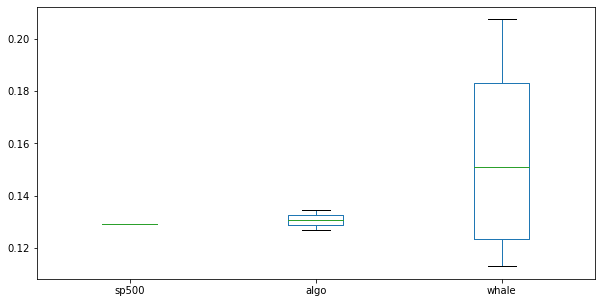

In [37]:
all_std.plot.box(figsize=(10,5))

In [38]:
# Portfolios riskier than the sp500 are: Algo2, BerkShire, and Tiger
# Portfolios less risky than the sp500 are: Algo1, Paulson, and Soros

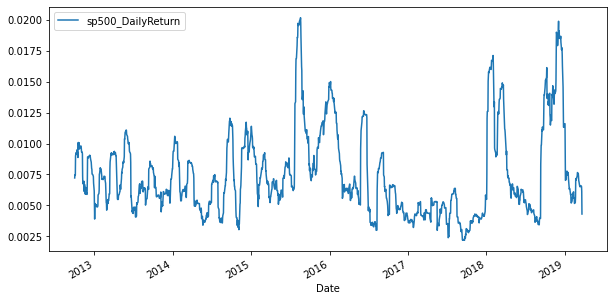

In [39]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
sp500_rolling_std = sp500_daily_returns.rolling(window=21).std().plot(figsize=(10,5))
sp500_rolling_std

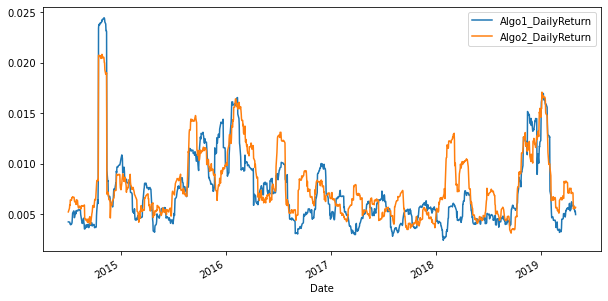

In [40]:
algo_rolling_std = algo_daily_returns.rolling(window=21).std().plot(figsize=(10,5))
algo_rolling_std

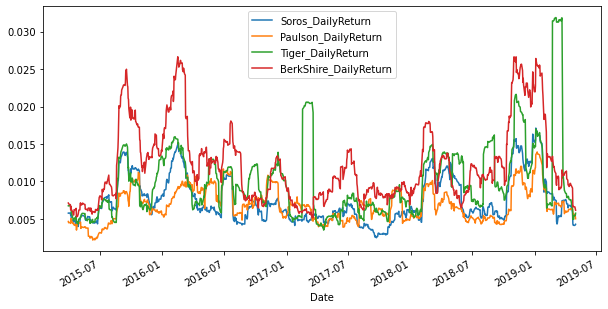

In [41]:
whale_rolling_std = whale_daily_returns.rolling(window=21).std().plot(figsize=(10,5))
whale_rolling_std

In [42]:
# Calculate the correlation
# Display de correlation matrix
correlation = portfolio_appended_data.corr()
correlation

,sp500_DailyReturn,Algo1_DailyReturn,Algo2_DailyReturn,Soros_DailyReturn,Paulson_DailyReturn,Tiger_DailyReturn,BerkShire_DailyReturn
sp500_DailyReturn,1.000000,-0.033782,-0.000437,0.000356,0.014023,-0.001437,-0.014410
Algo1_DailyReturn,-0.033782,1.000000,0.285622,0.323080,0.270573,0.165273,0.293619
Algo2_DailyReturn,-0.000437,0.285622,1.000000,0.840785,0.689604,0.515774,0.699464
Soros_DailyReturn,0.000356,0.323080,0.840785,1.000000,0.699856,0.561050,0.754154
Paulson_DailyReturn,0.014023,0.270573,0.689604,0.699856,1.000000,0.434307,0.545504
Tiger_DailyReturn,-0.001437,0.165273,0.515774,0.561050,0.434307,1.000000,0.424143
BerkShire_DailyReturn,-0.014410,0.293619,0.699464,0.754154,0.545504,0.424143,1.000000


In [43]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend
# For this exercise I will compare the sp500 to Soros

sp500_whale_appended_data = pd.concat([sp500_daily_returns, whale_daily_returns], axis="columns", join="inner")
sp500_whale_appended_data.drop(columns=['Paulson_DailyReturn', 'Tiger_DailyReturn', 'BerkShire_DailyReturn'], inplace=True)
sp500_whale_appended_data.head()

,sp500_DailyReturn,Soros_DailyReturn
Date,,
2019-04-22,-0.008764,-0.002586
2019-04-18,-0.001011,0.001448
2019-04-17,-0.001577,-0.002897
2019-04-16,0.002279,0.002699
2019-04-15,-0.000509,-0.001422


In [44]:
covariance = sp500_whale_appended_data['Soros_DailyReturn'].cov(sp500_whale_appended_data['sp500_DailyReturn'])
covariance

2.454031611765696e-08

In [45]:
variance = sp500_whale_appended_data['Soros_DailyReturn'].var()
variance

6.413564287134932e-05

In [46]:
berkshire_beta = covariance / variance
berkshire_beta

0.0003826314825733136

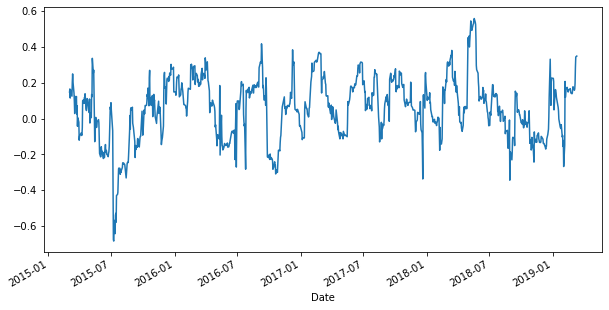

In [47]:
# for the trend, my best guess at the directions is (30 day rolling window trend)
rolling_covariance = sp500_whale_appended_data['Soros_DailyReturn'].rolling(window=30).cov(sp500_whale_appended_data['sp500_DailyReturn'])
rolling_variance = sp500_whale_appended_data['Soros_DailyReturn'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10,5))

In [48]:
# Annualized Sharpe Ratios
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = (portfolio_appended_data.mean() * 252) / (portfolio_appended_data.std() * np.sqrt(252))
sharpe_ratios

sp500_DailyReturn       -0.354682
Algo1_DailyReturn        1.396532
Algo2_DailyReturn        0.481300
Soros_DailyReturn        0.347765
Paulson_DailyReturn     -0.498407
Tiger_DailyReturn       -0.132035
BerkShire_DailyReturn    0.615371
dtype: float64

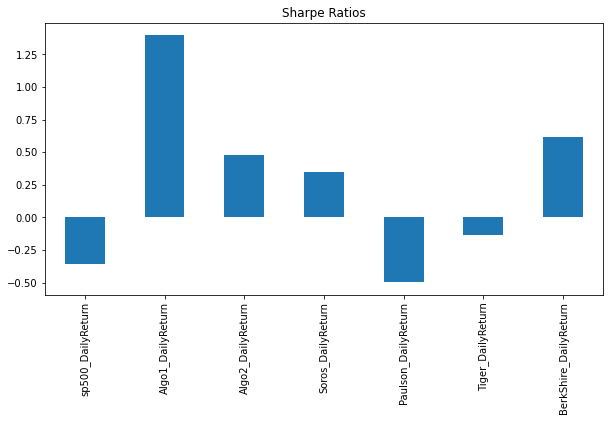

In [49]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

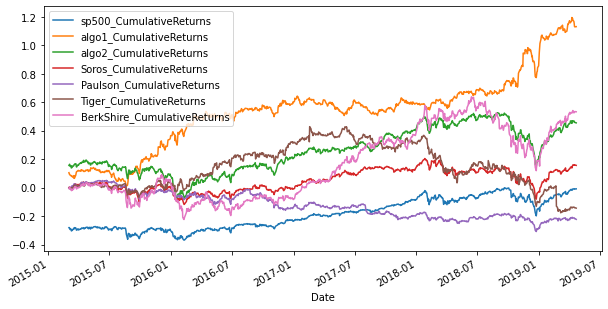

In [50]:
## final answer: Algo1 is the best overall performer (better than both sp500 and the whale portfolios). Algo1 also had the best sharpe ratio, meaning the best return for risk incurred.
who_won_appended_data = pd.concat([sp500_cumulative, algo_cumulative, whale_cumulative], axis="columns", join="inner")
who_won_appended_data.plot(figsize=(10,5))

In [54]:
# begin custom portfolio
apple_prices_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/aapl_historical.csv")
costco_prices_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/cost_historical.csv")
google_prices_path = Path("C:/Repositories/Homework3_Pandas/homework-pandas/goog_historical.csv")

apple_prices_df = pd.read_csv(apple_prices_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_prices_df = pd.read_csv(costco_prices_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_prices_df = pd.read_csv(google_prices_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

apple_prices_df.drop(columns=['Symbol'], inplace=True)
costco_prices_df.drop(columns=['Symbol'], inplace=True)
google_prices_df.drop(columns=['Symbol'], inplace=True)

apple_column_rename = ['AAPL']
costco_column_rename = ['COST']
google_column_rename = ['GOOG']

apple_prices_df.columns = apple_column_rename
costco_prices_df.columns = costco_column_rename
google_prices_df.columns = google_column_rename

custom_appended_data = pd.concat([apple_prices_df, costco_prices_df, google_prices_df], axis="columns", join="inner")
custom_appended_data.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [55]:
custom_returns_data = custom_appended_data.pct_change()
custom_returns_data.dropna(inplace=True)
custom_returns_data.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


In [56]:
# Set weights
weights = [1/3, 1/3, 1/3]
custom_returns_weighted = custom_returns_data.dot(weights)
custom_returns_weighted.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

In [57]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_data = pd.concat([sp500_daily_returns, algo_daily_returns, whale_daily_returns, custom_returns_weighted], axis="columns", join="inner")
all_portfolio_data.dropna(inplace=True)
all_portfolio_columns = ['SP500', 'ALGO1', 'ALGO2', 'SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE', 'CUSTOM']
all_portfolio_data.columns = all_portfolio_columns
all_portfolio_data.head()

,SP500,ALGO1,ALGO2,SOROS,PAULSON,TIGER,BERKSHIRE,CUSTOM
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088,-0.011812
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,-0.001148
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001541
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,-0.009149
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000326


In [58]:
# Calculate the annualized `std`
custom_returns_weighted_std = custom_returns_weighted.std()
custom_annualized_std = custom_returns_weighted_std * np.sqrt(252)
custom_annualized_std

0.21213124330247468

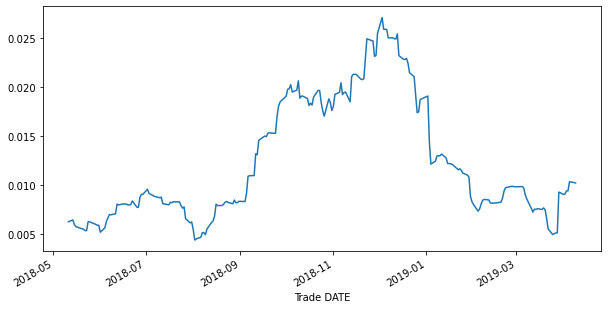

In [59]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
custom_rolling_std = custom_returns_weighted.rolling(window=21).std().plot(figsize=(10,5))
custom_rolling_std

In [60]:
correlation_2 = all_portfolio_data.corr()
correlation_2

,SP500,ALGO1,ALGO2,SOROS,PAULSON,TIGER,BERKSHIRE,CUSTOM
SP500,1.000000,-0.052526,-0.043500,-0.028110,-0.060063,0.005561,-0.038879,0.870022
ALGO1,-0.052526,1.000000,0.364557,0.337811,0.361719,0.114456,0.327037,0.075490
ALGO2,-0.043500,0.364557,1.000000,0.866369,0.787822,0.410245,0.785820,0.038488
SOROS,-0.028110,0.337811,0.866369,1.000000,0.791030,0.476994,0.816192,0.061761
PAULSON,-0.060063,0.361719,0.787822,0.791030,1.000000,0.484962,0.650132,0.025809
TIGER,0.005561,0.114456,0.410245,0.476994,0.484962,1.000000,0.323955,0.035911
BERKSHIRE,-0.038879,0.327037,0.785820,0.816192,0.650132,0.323955,1.000000,0.006794
CUSTOM,0.870022,0.075490,0.038488,0.061761,0.025809,0.035911,0.006794,1.000000


In [61]:
sp500_custom_appended_data = pd.concat([sp500_daily_returns, custom_returns_weighted], axis="columns", join="inner")
sp500_custom_columns = ['SP500', 'CUSTOM']
sp500_custom_appended_data.columns =sp500_custom_columns
sp500_custom_appended_data.head()

,SP500,CUSTOM
2019-04-22,-0.008764,-0.011812
2019-04-18,-0.001011,-0.001148
2019-04-17,-0.001577,-0.001541
2019-04-16,0.002279,-0.009149
2019-04-15,-0.000509,-0.000326


In [62]:
covariance_custom = sp500_custom_appended_data['CUSTOM'].cov(sp500_custom_appended_data['SP500'])
covariance_custom

0.0001119510592474691

In [63]:
variance_custom = sp500_custom_appended_data['CUSTOM'].var()
variance_custom

0.0001802678375660317

In [64]:
# calculate standard beta
beta_custom = covariance_custom / variance_custom
beta_custom 

0.6210262504894234

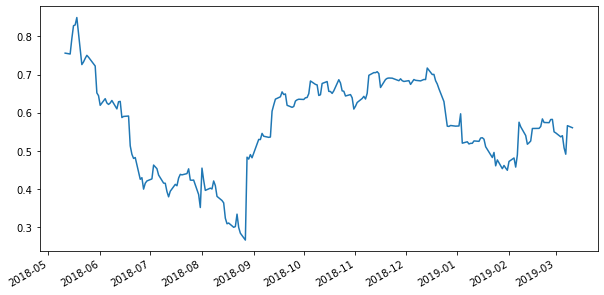

In [65]:
#calculate and plot rolling beta
custom_rolling_covariance = sp500_custom_appended_data['CUSTOM'].rolling(window=30).cov(sp500_custom_appended_data['SP500'])
custom_rolling_variance = sp500_custom_appended_data['CUSTOM'].rolling(window=30).var()
custom_rolling_beta = custom_rolling_covariance / custom_rolling_variance
custom_rolling_beta.plot(figsize=(10,5))

In [66]:
# calculate and visualize sharpe ratios
all_sharpe_ratios = (all_portfolio_data.mean() * 252) / (all_portfolio_data.std() * np.sqrt(252))
all_sharpe_ratios

SP500       -0.494630
ALGO1        2.106800
ALGO2       -0.037390
SOROS        0.348447
PAULSON      0.238560
TIGER       -1.063530
BERKSHIRE    0.085912
CUSTOM      -0.666178
dtype: float64

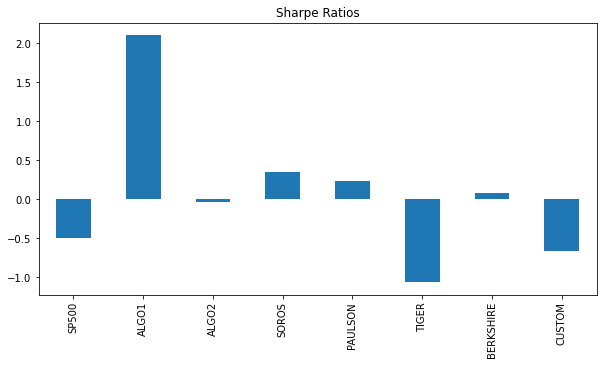

In [67]:
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(10,5))

In [68]:
# Result is that the sharpe ratio here is low, which is likely due to the higher price fluctuations presented by the tech stocks (note that this is pre-pandemic)

In [70]:
custom_cumulative = (1 + custom_returns_weighted).cumprod() - 1
custom_cumulative.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.002391
2019-05-06    0.021633
2019-05-03    0.026376
2019-05-02    0.012898
dtype: float64

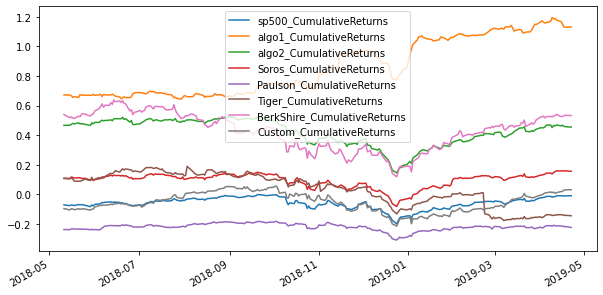

In [79]:
all_portfolios_plot = pd.concat([sp500_cumulative, algo_cumulative, whale_cumulative, custom_cumulative], axis="columns", join="inner")
all_portfolios_plot.columns.values[7] = "Custom_CumulativeReturns"
all_portfolios_plot.plot(figsize=(10,5))